# Signal Detection Theory
For this lab session we are going to explore the Signal Detection Theory. Before going into details of SDT, let's first set up some background.

Signal detection theory (SDT) is a technique that can be used to evaluate sensitivity in decision- making. SDT was initially developed by radar researchers in the early 1950s, and was quickly recognized by cognitive scientists and adapted for application in human decision-making. The starting point for signal detection theory is that nearly all reasoning and decision making takes place in the presence of some uncertainty.



## False alarm & Hit
Signal detection is a general framework in which an observer tries to detect the presence or absence of a signal.[Examples...] 

For this binary decision problem, we can expect the following 4 outcomes:

- You correctedly report the signal present when it is present: __Hit__ (also called True positive in statistics)
- You correctedly report the signal absent when it is absent: __Correct reject__ (also called True negative in statistics)
- You report the signal present when it is absent: __False alarm__ (false positive or type 1 error)
- You report the signal absent when it is present: __Miss__ (false negative or type 2 error) 
<img src=https://images.flatworldknowledge.com/stangor/stangor-fig04_004.jpg width="600"/>

### Sensitivity
Sensitivity (also called the true positive rate, the recall, or probability of detection[1] in some fields) measures the proportion of actual positives that are correctly identified as such (e.g., the percentage of sick people who are correctly identified as having the condition).

## Internal Response and Internal Noise
-Noise: uncertainty

-Internal response: there is some internal state, reflected by neural activity somewhere in the brain, that determines the doctor's impression about whether or not a tumor is present. This is a fundamental issue; the state of your mind is reflected by neural activity somewhere in your brain. This internal response is inherently noisy. 

SDT assumes that your internal response will vary randomly over trials around an average value, producing a normal curve distribution of internal responses.


## Information & criterion
### information acquisition
The distribution of internal signal (response) strength should be different when signal is present or absent. [example: Imagine that a radiologist is examining a CT scan, looking for evidence of a tumor.] with more practice/training they will be able to acquire more (and more reliable) information --> increase the likelihood of getting either a hit or a correct rejection, while reducing the likelihood of an outcome in the two error boxes.

### Criterion
The decision-maker bases their decision relative to their criterion (β), where a signal will be reported present when the internal signal is stronger than β and absent when the internal signal is weaker than β. A subject can have a very conservative criteria (only say the light is a candle if you are very sure). This will lower false-alarm rates, but then you may make more misses. A subject alternatively can change their criteria so that they are less prone to missing, but then they will make more false-alarms.
<img src=http://gru.stanford.edu/lib/exe/fetch.php/tutorials/nobias.png?w=&h=&cache=cache>




<font color=pink, size='5'>*Signal detection theory allows you to compute sensitivity and criteria separately from subject responses*</font>

In [1]:
#[crayon-5cbd15f989f55544260671 inline="true" ]
from scipy.stats import norm
import math
Z = norm.ppf
 
def SDT(hits, misses, fas, crs):
    """ returns a dict with d-prime measures given hits, misses, false alarms, and correct rejections"""
    # Floors an ceilings are replaced by half hits and half FA's
    half_hit = 0.5 / (hits + misses)
    half_fa = 0.5 / (fas + crs)
 
    # Calculate hit_rate and avoid d' infinity
    hit_rate = hits / (hits + misses)
    if hit_rate == 1: 
        hit_rate = 1 - half_hit
    if hit_rate == 0: 
        hit_rate = half_hit
 
    # Calculate false alarm rate and avoid d' infinity
    fa_rate = fas / (fas + crs)
    if fa_rate == 1: 
        fa_rate = 1 - half_fa
    if fa_rate == 0: 
        fa_rate = half_fa
 
    # Return d', beta, c and Ad'
    out = {}
    out['d'] = Z(hit_rate) - Z(fa_rate)
    out['beta'] = math.exp((Z(fa_rate)**2 - Z(hit_rate)**2) / 2)
    out['c'] = -(Z(hit_rate) + Z(fa_rate)) / 2
    out['Ad'] = norm.cdf(out['d'] / math.sqrt(2))
    
    return(out)


In [2]:
SDT(3,10,2,40)

{'Ad': 0.7450767571534251,
 'beta': 3.066951351009978,
 'c': 1.2023535556616045,
 'd': 0.93207527657095}

In [1]:
%matplotlib notebook

In [2]:
from plot_std import SDT_demo

<IPython.core.display.Javascript object>


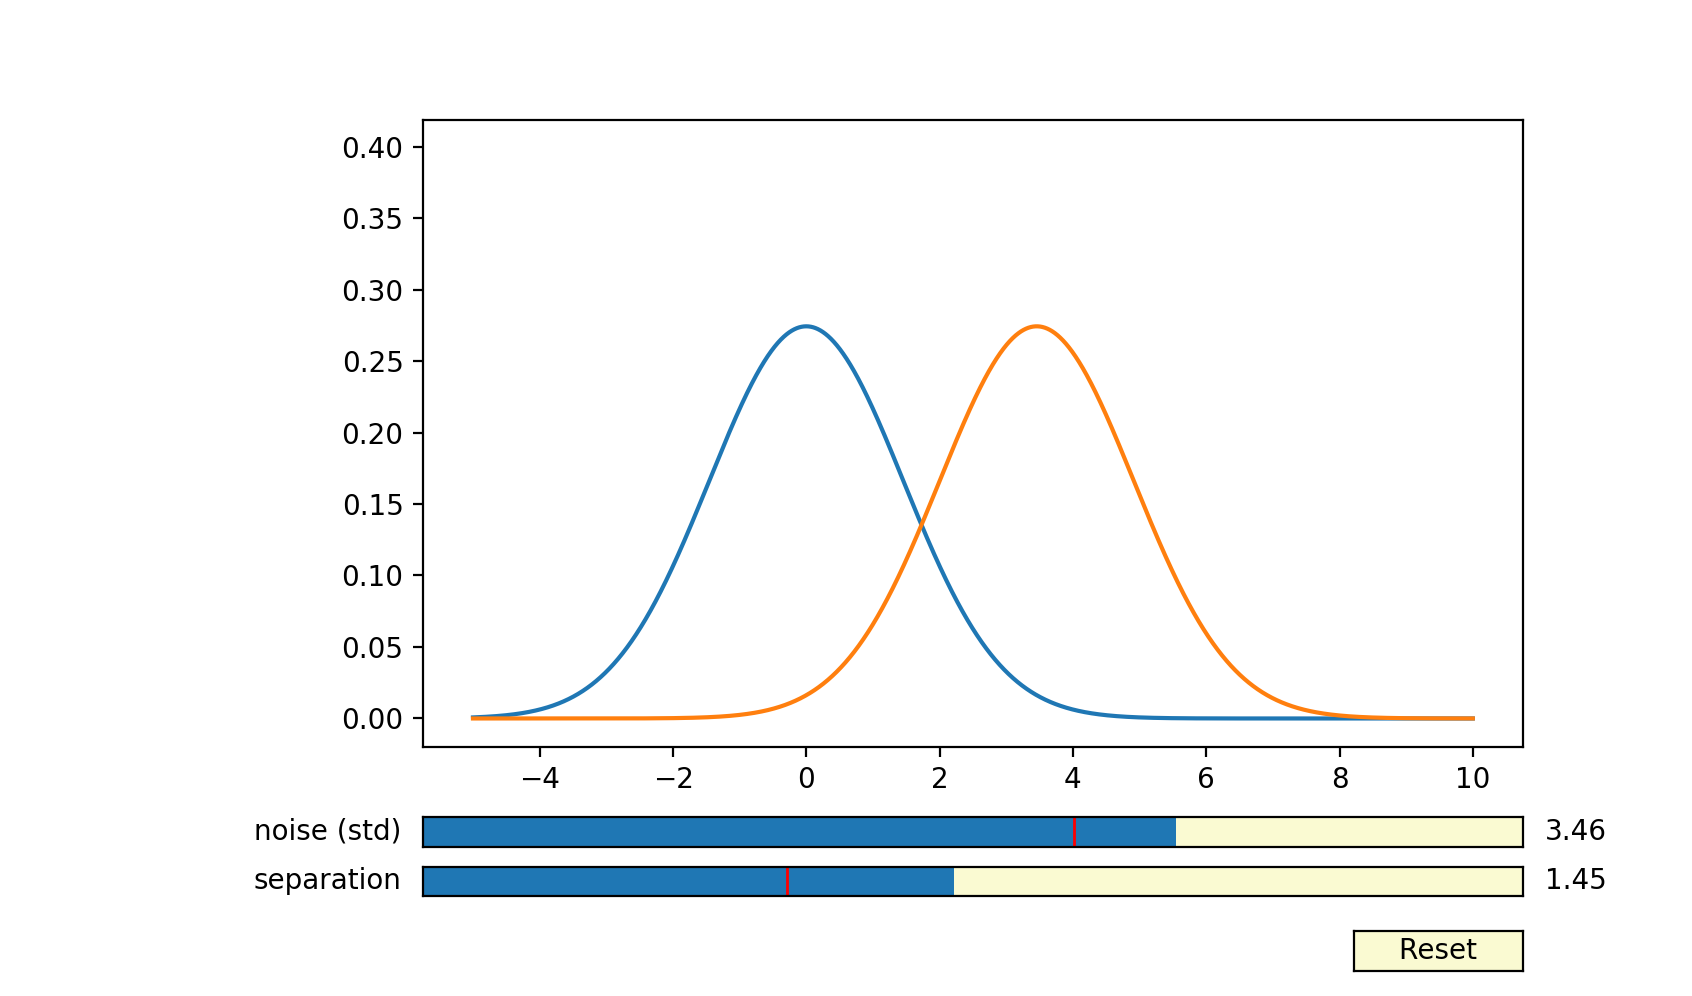

In [3]:
SDT_demo()

### Make signal array

### Make ideal observer responses

### Calculate hits, misses, correct-rejects and false-alarms

### Calculate d'

### Different criterion